In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('monthly_csv.csv')
x = dataset.iloc[:, 0:1].values
x = np.array(x)
for item in x:
    item[0] = (float(item[0][0:4]) * 12) + (float(item[0][5:]))

treeshold = 820

raw_x = x[:]
raw_y = dataset.iloc[:, 1].values

for i in range(0, len(raw_x)):
    raw_x[i][0] = raw_x[i][0]/23401

test_x = x[treeshold:]
test_y = dataset.iloc[treeshold:, 1].values

x = x[:treeshold]
y = dataset.iloc[:treeshold, 1].values

In [3]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

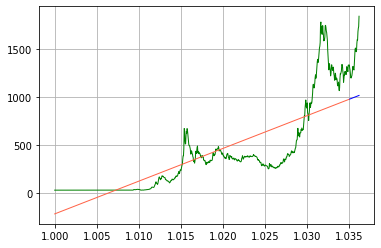

In [4]:
y_pred = regressor.predict(test_x)
# plt.scatter(test_x, Y_test,color = 'red')
# plt.plot(X_train,regressor.predict(X_train),color = 'blue')


plt.plot(raw_x, raw_y, lw=1,  color='green')
plt.plot(x, regressor.predict(x), lw=1, color='tomato')
plt.plot(test_x, y_pred, lw=1, color='blue')
plt.grid()

In [7]:
from sklearn import metrics
mse = metrics.mean_squared_error(test_y, y_pred)
mae = metrics.mean_absolute_error(test_y, y_pred)
np.sqrt(metrics.mean_squared_error(test_y, y_pred))
score = regressor.score(test_x, test_y)

print("R-squared:", score)
print("MSE:", mse)
print("MAE:", mae)

R-squared: -5.246729370502076
MSE: 206347.80352364606
MAE: 420.73966463395226


R-squared: 0.6624702047515193
MSE: 65080.158391152494
MAE: 203.95806618017227


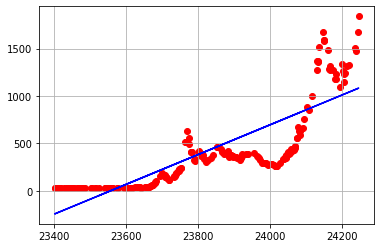

In [12]:
X = dataset.iloc[ :, 0:1].values
Y = dataset.iloc[ :, 1].values 

for item in X:
    item[0] = (float(item[0][0:4]) * 12) + (float(item[0][5:]))

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)
# print(X_train)
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.grid()

Y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(Y_test,Y_pred)
mae = metrics.mean_absolute_error(Y_test,Y_pred)
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
score = regressor.score(X_test,Y_test)

print("R-squared:", score)
print("MSE:", mse)
print("MAE:", mae)